In [1]:
#https://github.com/bhargavvader/personal/blob/master/notebooks/text_analysis_tutorial/topic_modelling.ipynb
#https://www.youtube.com/watch?v=ZkAFJwi-G98

In [2]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

C:\Users\agodbole\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [4]:
my_stop_words= [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [5]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [6]:
doc = nlp(text)

In [7]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [8]:

# we add some words to the stop word list# we add 
texts, article, skl_texts = [], [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        skl_texts.append(' '.join(article))
        texts.append(article)
        article = []

In [9]:
#bigram code to be included

In [10]:
dictionary  = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [11]:
corpus[1][0:10]

[(44, 1),
 (83, 1),
 (94, 1),
 (95, 1),
 (102, 2),
 (117, 3),
 (118, 1),
 (119, 2),
 (120, 2),
 (121, 1)]

In [12]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [13]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.433*"the" + 0.417*"-PRON-" + 0.198*"palestinian" + 0.146*"attack" + 0.141*"arafat" + 0.128*"israeli" + 0.120*"force" + 0.112*"us" + 0.111*"government" + 0.109*"new"'),
 (1,
  '-0.463*"palestinian" + -0.332*"arafat" + -0.297*"israeli" + 0.269*"-PRON-" + -0.163*"sharon" + -0.156*"israel" + -0.148*"gaza" + -0.133*"hamas" + -0.122*"attack" + 0.119*"the"'),
 (2,
  '0.255*"afghanistan" + 0.251*"us" + 0.248*"laden" + 0.247*"bin" + -0.208*"south" + 0.202*"force" + -0.197*"fire" + 0.175*"qaeda" + 0.171*"al" + 0.163*"taliban"'),
 (3,
  '0.512*"-PRON-" + -0.389*"fire" + -0.238*"the" + -0.199*"new" + -0.173*"south" + -0.163*"area" + -0.146*"sydney" + -0.119*"force" + 0.117*"win" + -0.117*"firefighter"'),
 (4,
  '-0.460*"the" + 0.278*"south" + 0.232*"fire" + -0.177*"government" + 0.167*"-PRON-" + -0.159*"company" + 0.157*"test" + 0.142*"area" + 0.134*"day" + -0.125*"union"')]

In [14]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [15]:
hdpmodel.show_topics()

[(0,
  '0.006*-PRON- + 0.005*palestinian + 0.005*the + 0.004*israeli + 0.004*state + 0.002*arrest + 0.002*party + 0.002*hamas + 0.002*fire + 0.002*match + 0.002*go + 0.002*not + 0.002*attack + 0.002*islamic + 0.002*new + 0.002*year + 0.002*australian + 0.002*be + 0.002*a + 0.002*west'),
 (1,
  '0.007*-PRON- + 0.006*us + 0.004*taliban + 0.004*laden + 0.004*bin + 0.003*airport + 0.003*afghanistan + 0.003*kandahar + 0.002*the + 0.002*force + 0.002*powell + 0.002*near + 0.002*osama + 0.002*kill + 0.002*opposition + 0.002*city + 0.002*night + 0.002*southern + 0.002*man + 0.002*time'),
 (2,
  '0.004*palestinian + 0.004*-PRON- + 0.003*group + 0.003*the + 0.003*director + 0.003*attack + 0.003*friedli + 0.002*suicide + 0.002*right + 0.002*people + 0.002*government + 0.002*sharon + 0.002*company + 0.002*kill + 0.002*choose + 0.002*gaza + 0.002*arafat + 0.002*israeli + 0.002*profound + 0.002*world'),
 (3,
  '0.004*the + 0.003*australia + 0.002*-PRON- + 0.002*economy + 0.002*job + 0.002*follow + 0

In [16]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [17]:
ldamodel.show_topics()

[(0,
  '0.020*"-PRON-" + 0.015*"the" + 0.004*"australian" + 0.004*"tell" + 0.004*"child" + 0.004*"south" + 0.004*"people" + 0.004*"fire" + 0.004*"afghanistan" + 0.003*"minister"'),
 (1,
  '0.022*"the" + 0.015*"-PRON-" + 0.008*"new" + 0.007*"palestinian" + 0.007*"australia" + 0.006*"attack" + 0.005*"people" + 0.005*"israeli" + 0.005*"year" + 0.005*"south"'),
 (2,
  '0.013*"-PRON-" + 0.012*"the" + 0.006*"new" + 0.005*"palestinian" + 0.005*"attack" + 0.004*"year" + 0.004*"fire" + 0.004*"south" + 0.004*"government" + 0.004*"arafat"'),
 (3,
  '0.020*"the" + 0.014*"-PRON-" + 0.006*"palestinian" + 0.005*"new" + 0.005*"year" + 0.005*"arafat" + 0.004*"government" + 0.004*"australia" + 0.004*"report" + 0.004*"world"'),
 (4,
  '0.017*"-PRON-" + 0.014*"the" + 0.007*"australia" + 0.006*"south" + 0.006*"australian" + 0.004*"palestinian" + 0.004*"year" + 0.004*"people" + 0.004*"day" + 0.004*"group"'),
 (5,
  '0.014*"the" + 0.011*"-PRON-" + 0.008*"us" + 0.007*"people" + 0.007*"government" + 0.007*"afg

In [18]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      23.374132        1       1 -0.030786 -0.037628
4      11.377621        1       2 -0.015222 -0.028002
3      10.652019        1       3 -0.062033  0.018855
5      10.502254        1       4  0.034266  0.026498
2       9.301685        1       5 -0.007919 -0.006868
9       8.782787        1       6  0.057652 -0.017076
7       8.224694        1       7  0.014497 -0.031040
0       7.608363        1       8 -0.004597  0.028841
8       5.118258        1       9 -0.006078  0.028482
6       5.058185        1      10  0.020221  0.017938, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
210   Default  453.000000       -PRON-  453.000000  30.0000  30.0000
320   Default   74.000000  afghanistan   74.000000  29.0000  29.0000
102   Default  533.000000          the  533.000000  28.0000  28.0000
877   Default  127.000000   australian  127.000000  27.0000  27.0000
366   Default   53.000000      taliban   53.000000  26.0000  26.0000
484   Default   96.000000           us   96.000000  25.0000  25.0000
894   Default   30.000000        metre   30.000000  24.0000  24.0000
1226  Default   59.000000        laden   59.000000  23.0000  23.0000
1451  Default   57.000000          bin   57.000000  22.0000  22.0000
42    Default   94.000000         fire   94.000000  21.0000  21.0000
2314  Default   33.000000       qantas   33.000000  20.0000  20.0000
44    Default  107.000000        force  107.000000  19.0000  19.0000
2280  Default   60.000000      company   60.000000  18.0000  18.0000
807   Default   36.000000       afghan   36.000000  17.0000  17.0000
491   Default   72.000000        world   72.000000  16.0000  16.0000
275   Default   67.000000         tell   67.000000  15.0000  15.0000
2039  Default   48.000000        child   48.000000  14.0000  14.0000
933   Default   55.000000         test   55.000000  13.0000  13.0000
297   Default   45.000000         know   45.000000  12.0000  12.0000
355   Default   38.000000        power   38.000000  11.0000  11.0000
224   Default  113.000000          day  113.000000  10.0000  10.0000
1471  Default   45.000000        qaeda   45.000000   9.0000   9.0000
742   Default   43.000000      general   43.000000   8.0000   8.0000
163   Default   72.000000       police   72.000000   7.0000   7.0000
691   Default   71.000000     official   71.000000   6.0000   6.0000
2246  Default   14.000000        abuse   14.000000   5.0000   5.0000
1942  Default   18.000000     governor   18.000000   4.0000   4.0000
482   Default   76.000000       united   76.000000   3.0000   3.0000
1448  Default   50.000000           al   50.000000   2.0000   2.0000
236   Default  129.000000   government  129.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
2269  Topic10    1.879129       school   10.253837   1.2873  -6.7711
366   Topic10    5.342934      taliban   53.012558   0.6894  -5.7261
129   Topic10    3.653676        death   29.653864   0.8903  -6.1062
297   Topic10    4.661095         know   45.237778   0.7115  -5.8627
626   Topic10    1.866691       energy   10.347069   1.2716  -6.7777
210   Topic10   17.770628       -PRON-  453.135590  -0.2545  -4.5244
1276  Topic10    3.091594    statement   24.340744   0.9207  -6.2732
102   Topic10   17.147501          the  533.016846  -0.4525  -4.5601
2280  Topic10    5.024566      company   60.683609   0.4928  -5.7876
691   Topic10    5.404836     official   71.800629   0.3976  -5.7146
491   Topic10    5.360383        world   72.074936   0.3855  -5.7229
1207  Topic10    3.236801       charge   28.645943   0.8037  -6.2273
42    Topic10    5.997229         fire   94.230507   0.2297  -5.6106
236   Topic10    6.898996   government  129.895203   0.0488  -5.4705
82    Topic10    6.620078       people  136.937454  -0.0453  -5.51

In [19]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [20]:

lsi_coherence  = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [21]:

def  evaluate_bar_graphevaluate (coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

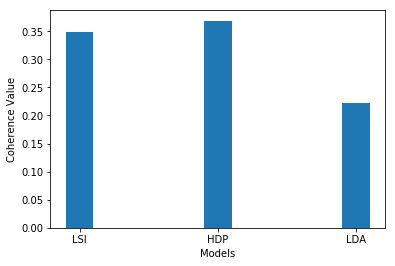

In [22]:

evaluate_bar_graphevaluate ([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])